Mounted at /content/drive
First Month:
Total Steps: 167411
Average Steps: 5580.366666666667
Std Steps: 3133.860101660827

Next Month:
Total Steps: 123413
Average Steps: 4113.766666666666
Std Steps: 2742.4013851862137

Last Month:
Total Steps: 142277
Average Steps: 4742.566666666667
Std Steps: 2565.982163016637



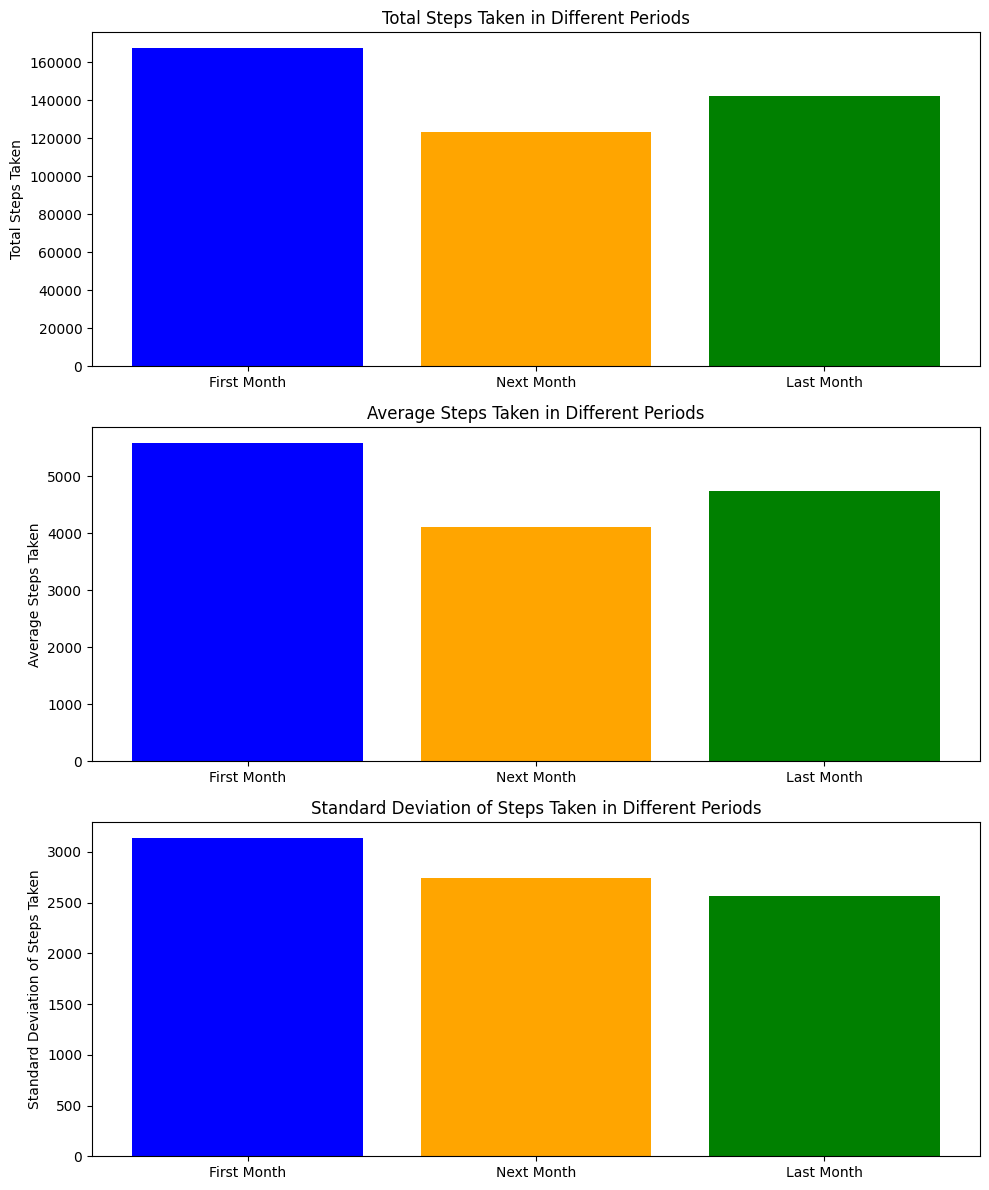

First Month:
Total Sleep Duration: 9905
Average Sleep Duration: 330.1666666666667
Std Sleep Duration: 91.45833169690779

Next Month:
Total Sleep Duration: 9907
Average Sleep Duration: 330.23333333333335
Std Sleep Duration: 71.48555838399294

Last Month:
Total Sleep Duration: 11214
Average Sleep Duration: 373.8
Std Sleep Duration: 44.8856017156873



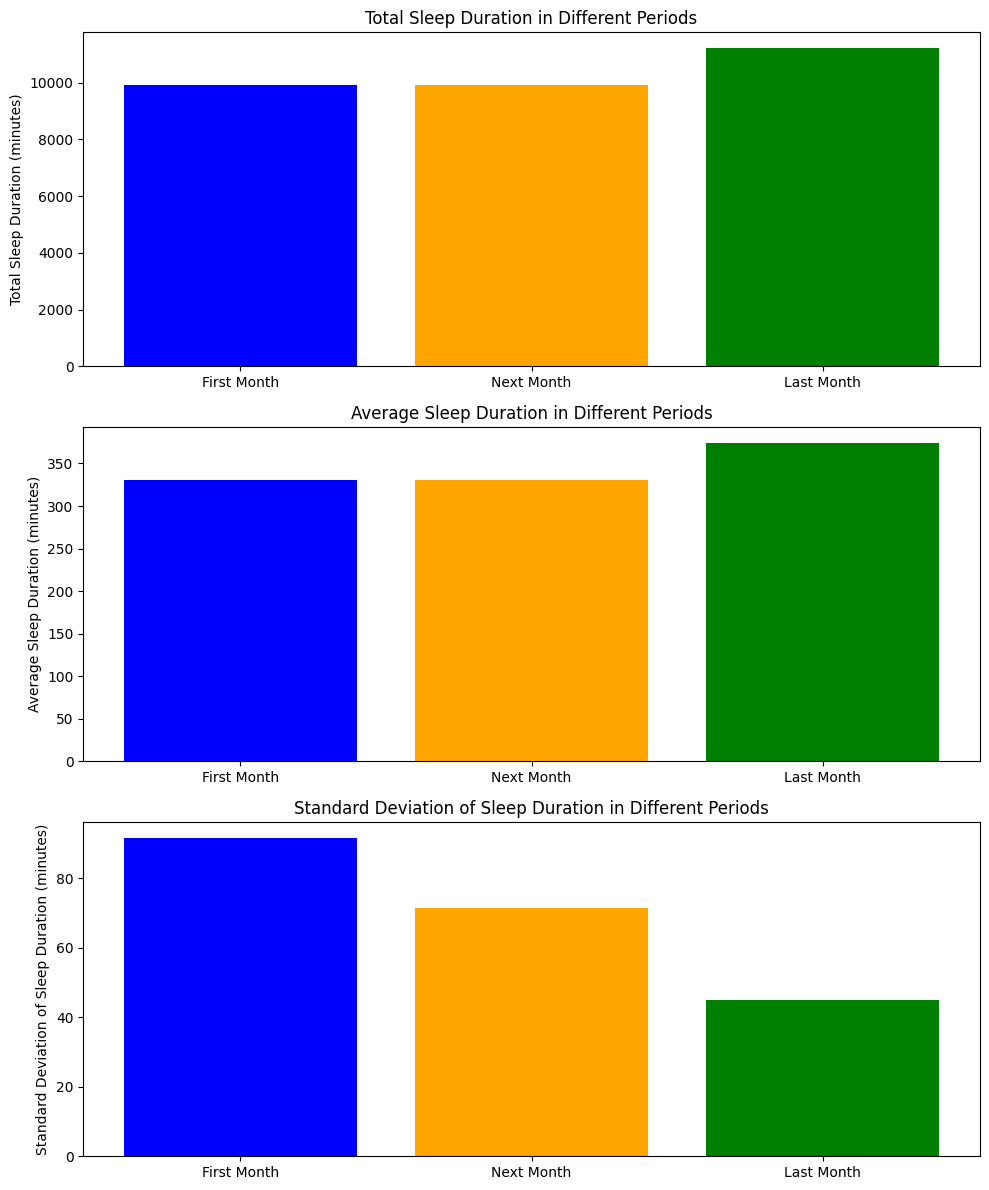

Correlation Coefficient between Sleep Duration and Steps Taken: 0.14373885180718465


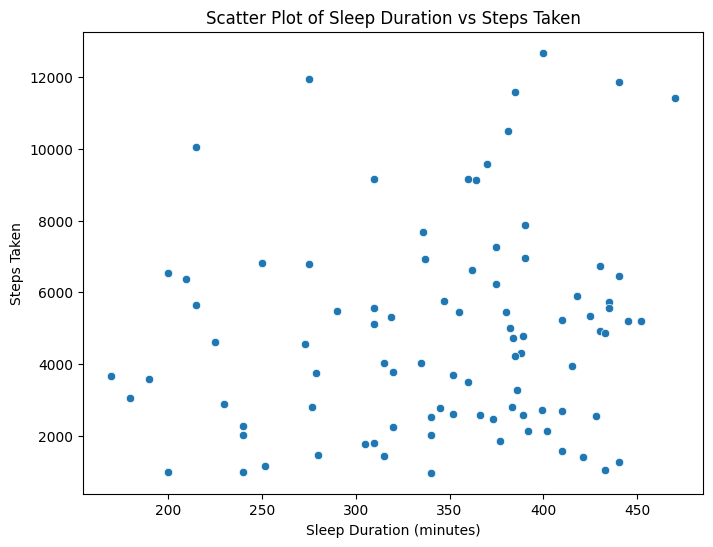

Correlation Coefficient between Sleep Duration and Steps Taken (First Month): 0.31680659280426776


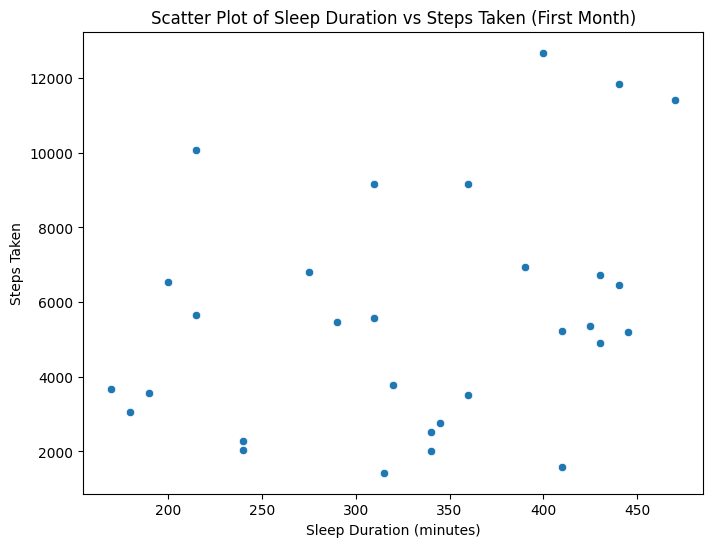

Correlation Coefficient between Sleep Duration and Steps Taken (Next Month): 0.09566622979508294


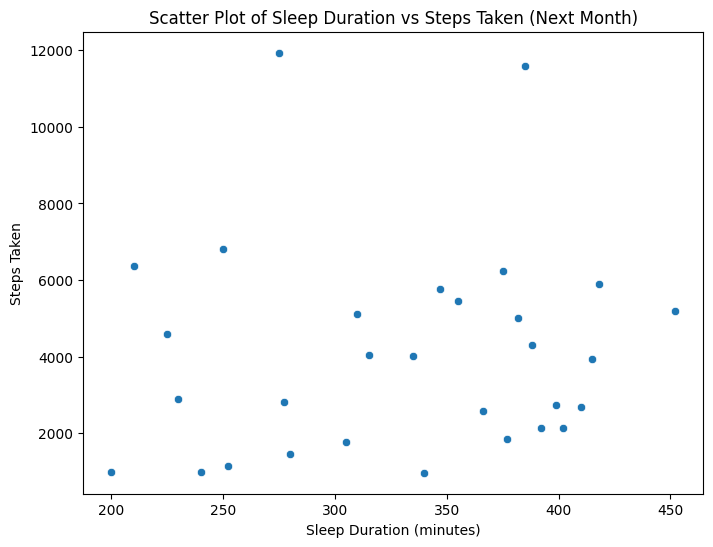

Correlation Coefficient between Sleep Duration and Steps Taken (Last Month): -0.11394128606167643


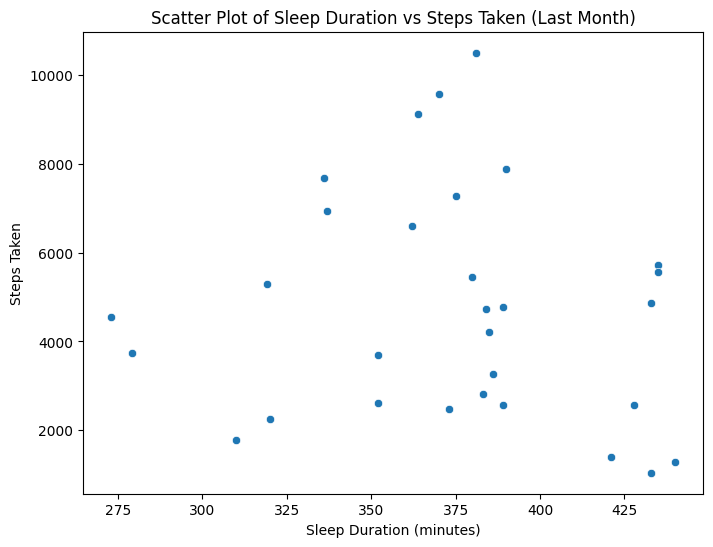

   Days  Steps taken  Sleep duration (minutes) the night before  \
0     1         1589                                        410   
1     2         5193                                        445   
2     3         4912                                        430   
3     4         9155                                        360   
4     5         2533                                        340   

   Max Stride Length (cm)  Min Stride Length (cm)  Walking Asymmetry (%)  \
0                      76                      36                    1.6   
1                      76                      47                    2.0   
2                      83                      52                    1.3   
3                      75                      39                    3.6   
4                      77                      57                    1.5   

   Average Stride Length (cm)  
0                        56.0  
1                        61.5  
2                        67.5  
3           

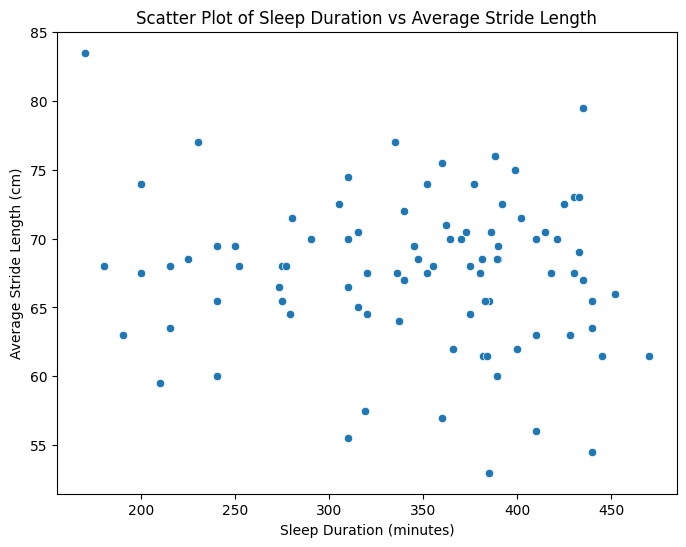

Correlation Coefficient between Sleep Duration and Walking Asymmetry: -0.05964786654164678


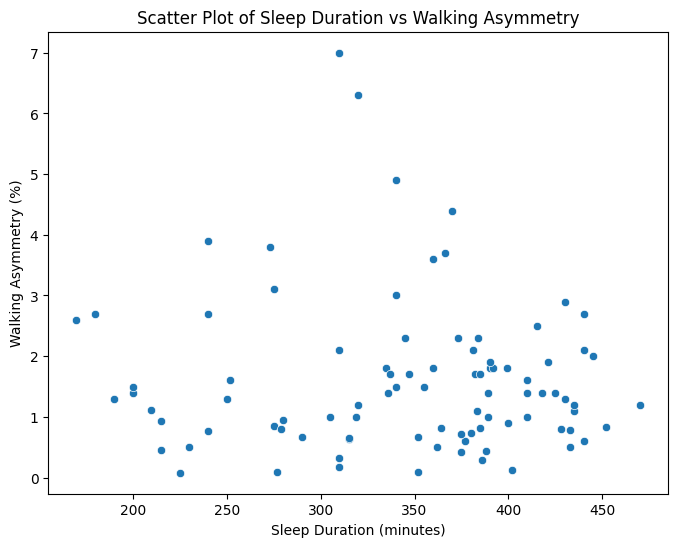

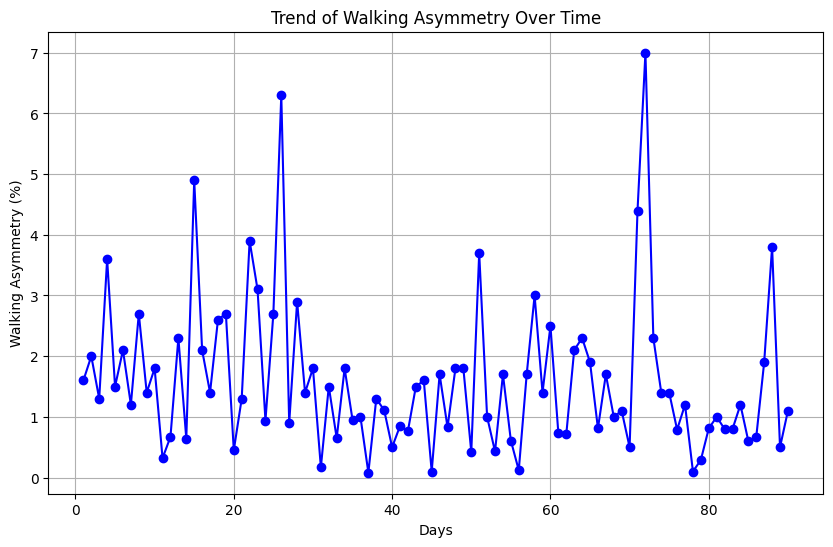

Statistics for Walking Asymmetry - First 30 Days:
count    30.000000
mean      2.084000
std       1.328537
min       0.320000
25%       1.300000
50%       1.800000
75%       2.700000
max       6.300000
Name: Walking Asymmetry (%), dtype: float64

Statistics for Walking Asymmetry - Next 30 Days:
count    30.000000
mean      1.219667
std       0.851305
min       0.080000
25%       0.620000
50%       1.055000
75%       1.700000
max       3.700000
Name: Walking Asymmetry (%), dtype: float64

Statistics for Walking Asymmetry - Last 30 Days:
count    30.000000
mean      1.497000
std       1.408668
min       0.100000
25%       0.745000
50%       1.050000
75%       1.850000
max       7.000000
Name: Walking Asymmetry (%), dtype: float64


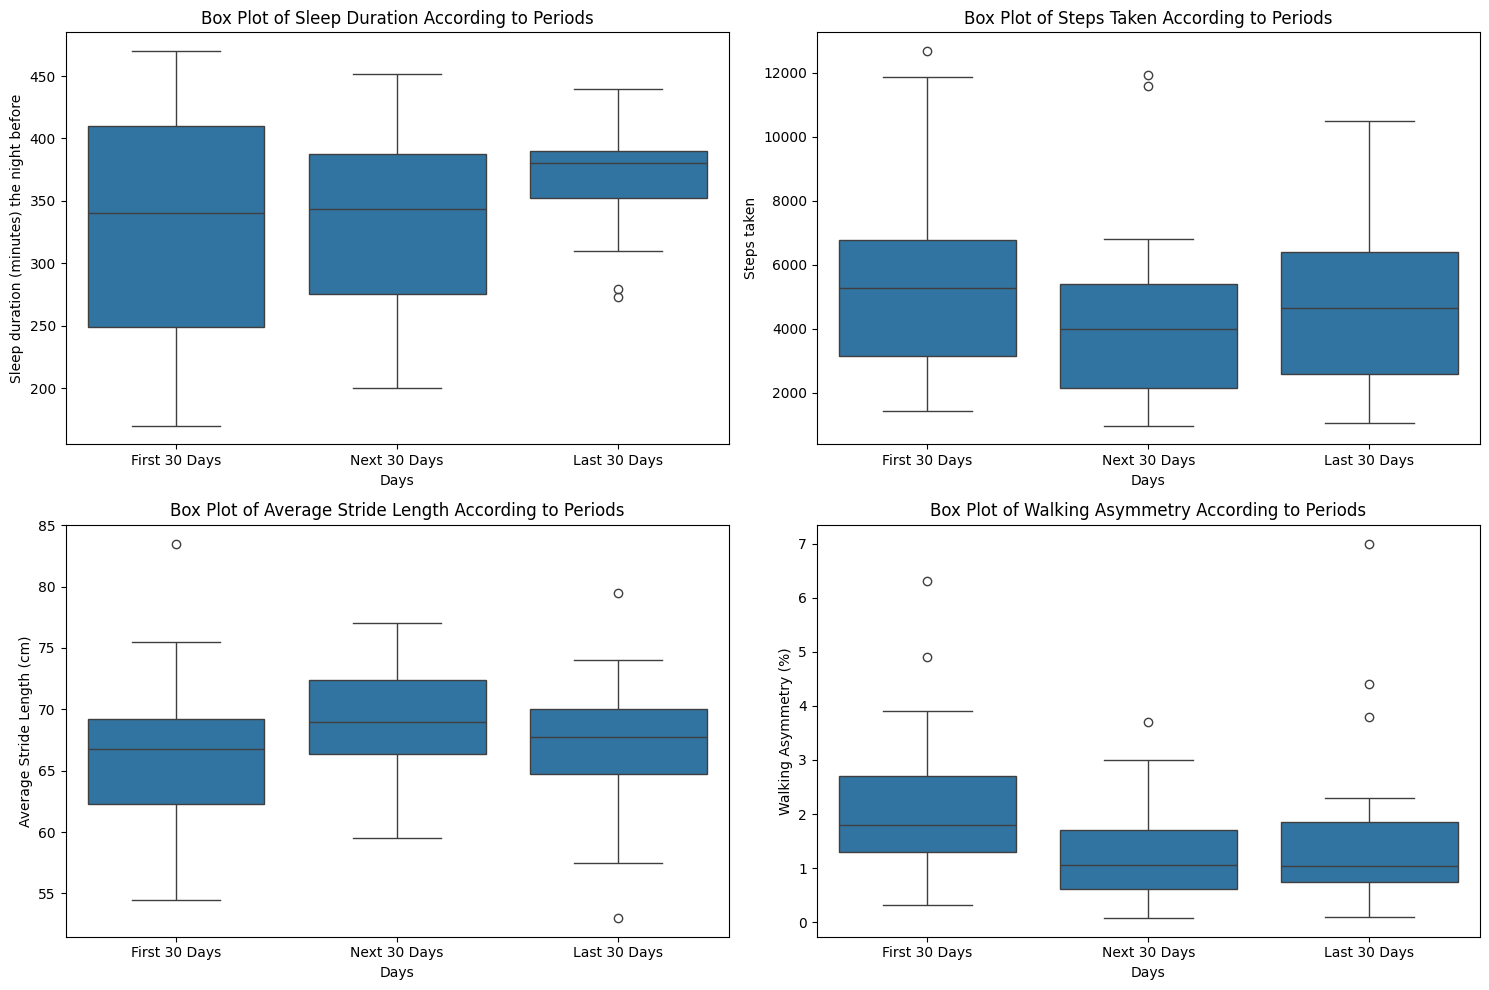

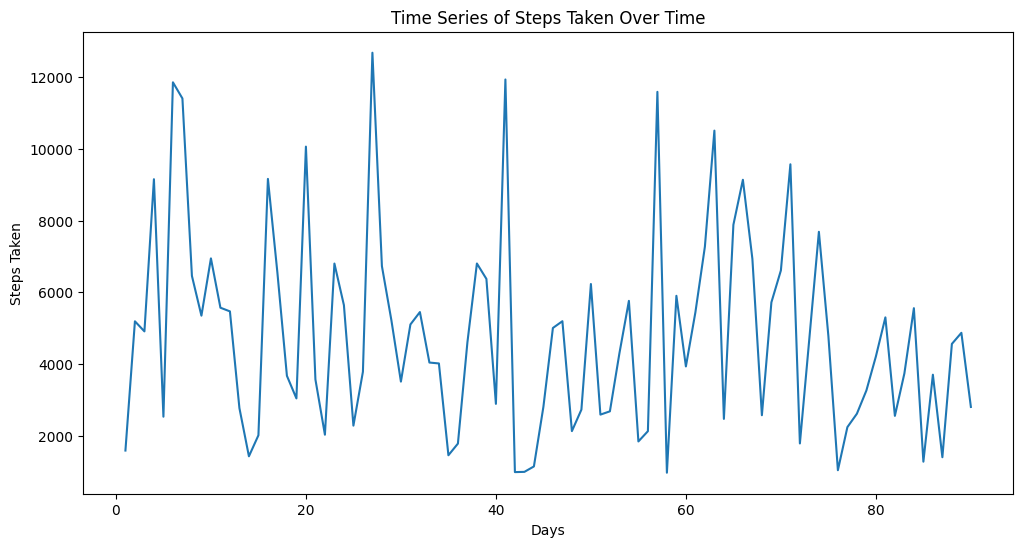

Mean Squared Error: 5077.30970724438
R-squared Score: -0.046672820421786554
             Days  Steps taken  Sleep duration (minutes) the night before  \
Day Type                                                                    
Weekday   45.0625       4784.0                                 349.104167   
Weekend   46.0000       4844.5                                 339.738095   

          Max Stride Length (cm)  Min Stride Length (cm)  \
Day Type                                                   
Weekday                83.416667               51.812500   
Weekend                82.119048               52.785714   

          Walking Asymmetry (%)  Average Stride Length (cm)  
Day Type                                                     
Weekday                1.782292                   67.614583  
Weekend                1.392143                   67.452381  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
drive.mount('/content/drive')
data_path="/content/drive/MyDrive/cs210 project data.xlsx"
df = pd.read_excel(data_path)

df.head()
first_month = df.head(30)
next_month = df.iloc[30:60]
last_month = df.tail(30)
#three months anaysis steps taken
total_steps_first_month = first_month['Steps taken'].sum()
average_steps_first_month = first_month['Steps taken'].mean()
std_steps_first_month = first_month['Steps taken'].std()

total_steps_next_month = next_month['Steps taken'].sum()
average_steps_next_month = next_month['Steps taken'].mean()
std_steps_next_month = next_month['Steps taken'].std()

total_steps_last_month = last_month['Steps taken'].sum()
average_steps_last_month = last_month['Steps taken'].mean()
std_steps_last_month = last_month['Steps taken'].std()


print("First Month:")
print("Total Steps:", total_steps_first_month)
print("Average Steps:", average_steps_first_month)
print("Std Steps:", std_steps_first_month)
print()

print("Next Month:")
print("Total Steps:", total_steps_next_month)
print("Average Steps:", average_steps_next_month)
print("Std Steps:", std_steps_next_month)
print()

print("Last Month:")
print("Total Steps:", total_steps_last_month)
print("Average Steps:", average_steps_last_month)
print("Std Steps:", std_steps_last_month)
print()


periods = ['First Month', 'Next Month', 'Last Month']
total_steps = [total_steps_first_month, total_steps_next_month, total_steps_last_month]
average_steps = [average_steps_first_month, average_steps_next_month, average_steps_last_month]
std_steps = [std_steps_first_month, std_steps_next_month, std_steps_last_month]


fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].bar(periods, total_steps, color=['blue', 'orange', 'green'])
axs[0].set_title('Total Steps Taken in Different Periods')
axs[0].set_ylabel('Total Steps Taken')

axs[1].bar(periods, average_steps, color=['blue', 'orange', 'green'])
axs[1].set_title('Average Steps Taken in Different Periods')
axs[1].set_ylabel('Average Steps Taken')

axs[2].bar(periods, std_steps, color=['blue', 'orange', 'green'])
axs[2].set_title('Standard Deviation of Steps Taken in Different Periods')
axs[2].set_ylabel('Standard Deviation of Steps Taken')

plt.tight_layout()
plt.show()
#sleep duration analysis
total_sleep_first_month = first_month['Sleep duration (minutes) the night before'].sum()
average_sleep_first_month = first_month['Sleep duration (minutes) the night before'].mean()
std_sleep_first_month = first_month['Sleep duration (minutes) the night before'].std()

total_sleep_next_month = next_month['Sleep duration (minutes) the night before'].sum()
average_sleep_next_month = next_month['Sleep duration (minutes) the night before'].mean()
std_sleep_next_month = next_month['Sleep duration (minutes) the night before'].std()

total_sleep_last_month = last_month['Sleep duration (minutes) the night before'].sum()
average_sleep_last_month = last_month['Sleep duration (minutes) the night before'].mean()
std_sleep_last_month = last_month['Sleep duration (minutes) the night before'].std()


print("First Month:")
print("Total Sleep Duration:", total_sleep_first_month)
print("Average Sleep Duration:", average_sleep_first_month)
print("Std Sleep Duration:", std_sleep_first_month)
print()

print("Next Month:")
print("Total Sleep Duration:", total_sleep_next_month)
print("Average Sleep Duration:", average_sleep_next_month)
print("Std Sleep Duration:", std_sleep_next_month)
print()

print("Last Month:")
print("Total Sleep Duration:", total_sleep_last_month)
print("Average Sleep Duration:", average_sleep_last_month)
print("Std Sleep Duration:", std_sleep_last_month)
print()


periods = ['First Month', 'Next Month', 'Last Month']
total_sleep = [total_sleep_first_month, total_sleep_next_month, total_sleep_last_month]
average_sleep = [average_sleep_first_month, average_sleep_next_month, average_sleep_last_month]
std_sleep = [std_sleep_first_month, std_sleep_next_month, std_sleep_last_month]


fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].bar(periods, total_sleep, color=['blue', 'orange', 'green'])
axs[0].set_title('Total Sleep Duration in Different Periods')
axs[0].set_ylabel('Total Sleep Duration (minutes)')

axs[1].bar(periods, average_sleep, color=['blue', 'orange', 'green'])
axs[1].set_title('Average Sleep Duration in Different Periods')
axs[1].set_ylabel('Average Sleep Duration (minutes)')

axs[2].bar(periods, std_sleep, color=['blue', 'orange', 'green'])
axs[2].set_title('Standard Deviation of Sleep Duration in Different Periods')
axs[2].set_ylabel('Standard Deviation of Sleep Duration (minutes)')

plt.tight_layout()
plt.show()
#correlation analysis steps taken sleep duration
sleep_duration = df['Sleep duration (minutes) the night before']
steps_taken = df['Steps taken']


correlation_coefficient = sleep_duration.corr(steps_taken)

print("Correlation Coefficient between Sleep Duration and Steps Taken:", correlation_coefficient)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=sleep_duration, y=steps_taken)
plt.title('Scatter Plot of Sleep Duration vs Steps Taken')
plt.xlabel('Sleep Duration (minutes)')
plt.ylabel('Steps Taken')
plt.show()

def analyze_and_visualize(period_df, title):
    sleep_duration = period_df['Sleep duration (minutes) the night before']
    steps_taken = period_df['Steps taken']


    correlation_coefficient = sleep_duration.corr(steps_taken)

    print(f"Correlation Coefficient between Sleep Duration and Steps Taken ({title}):", correlation_coefficient)


    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=sleep_duration, y=steps_taken)
    plt.title(f'Scatter Plot of Sleep Duration vs Steps Taken ({title})')
    plt.xlabel('Sleep Duration (minutes)')
    plt.ylabel('Steps Taken')
    plt.show()


analyze_and_visualize(first_month, 'First Month')
analyze_and_visualize(next_month, 'Next Month')
analyze_and_visualize(last_month, 'Last Month')

#calculation of average stride length
max_stride_length = df['Max Stride Length (cm)']
min_stride_length = df['Min Stride Length (cm)']


average_stride_length = (max_stride_length + min_stride_length) / 2


df['Average Stride Length (cm)'] = average_stride_length


print(df.head())
average_stride_length = df['Average Stride Length (cm)']

#correlation analysis sleep duration stride length
correlation_coefficient = sleep_duration.corr(average_stride_length)

print("Correlation Coefficient between Sleep Duration and Average Stride Length:", correlation_coefficient)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=sleep_duration, y=average_stride_length)
plt.title('Scatter Plot of Sleep Duration vs Average Stride Length')
plt.xlabel('Sleep Duration (minutes)')
plt.ylabel('Average Stride Length (cm)')
plt.show()

walking_asymmetry = df['Walking Asymmetry (%)']

#correlation analysis sleep duration-walking asymmetry
correlation_coefficient = sleep_duration.corr(walking_asymmetry)

print("Correlation Coefficient between Sleep Duration and Walking Asymmetry:", correlation_coefficient)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=sleep_duration, y=walking_asymmetry)
plt.title('Scatter Plot of Sleep Duration vs Walking Asymmetry')
plt.xlabel('Sleep Duration (minutes)')
plt.ylabel('Walking Asymmetry (%)')
plt.show()
days = df['Days']
#trend of walking asymmerty
plt.figure(figsize=(10, 6))
plt.plot(days, walking_asymmetry, marker='o', linestyle='-', color='b')
plt.title('Trend of Walking Asymmetry Over Time')
plt.xlabel('Days')
plt.ylabel('Walking Asymmetry (%)')
plt.grid(True)
plt.show()
first_month_stats = walking_asymmetry.head(30).describe()


next_month_stats = walking_asymmetry.iloc[30:60].describe()


last_month_stats = walking_asymmetry.tail(30).describe()


print("Statistics for Walking Asymmetry - First 30 Days:")
print(first_month_stats)
print()

print("Statistics for Walking Asymmetry - Next 30 Days:")
print(next_month_stats)
print()

print("Statistics for Walking Asymmetry - Last 30 Days:")
print(last_month_stats)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

#box plots
sns.boxplot(x=pd.cut(df['Days'], bins=3, labels=['First 30 Days', 'Next 30 Days', 'Last 30 Days']),
            y='Sleep duration (minutes) the night before', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Sleep Duration According to Periods')


sns.boxplot(x=pd.cut(df['Days'], bins=3, labels=['First 30 Days', 'Next 30 Days', 'Last 30 Days']),
            y='Steps taken', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Steps Taken According to Periods')

sns.boxplot(x=pd.cut(df['Days'], bins=3, labels=['First 30 Days', 'Next 30 Days', 'Last 30 Days']),
            y='Average Stride Length (cm)', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Average Stride Length According to Periods')


sns.boxplot(x=pd.cut(df['Days'], bins=3, labels=['First 30 Days', 'Next 30 Days', 'Last 30 Days']),
            y='Walking Asymmetry (%)', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Walking Asymmetry According to Periods')


plt.tight_layout()
plt.show()
#time series of steps taken
plt.figure(figsize=(12, 6))
sns.lineplot(x=days, y=steps_taken)
plt.title('Time Series of Steps Taken Over Time')
plt.xlabel('Days')
plt.ylabel('Steps Taken')
plt.show()
#regression analysis
X = df[['Steps taken', 'Average Stride Length (cm)', 'Walking Asymmetry (%)']]
y = df['Sleep duration (minutes) the night before']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')








days_reversed = df['Days'][::-1]
df['Day Type'] = days_reversed.apply(lambda x: 'Weekend' if ((x - 1) // 7) % 2 != 0 else 'Weekday')
df['Day Type'] = df['Day Type'][::-1]

# Grouping data by 'Day Type' and calculating mean values for comparison
grouped_data = df.groupby('Day Type').mean()

print(grouped_data)
